In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [3]:
df=pd.read_csv('customer_churn.csv')
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
358,9057-MSWCO,Male,1,Yes,No,27,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Credit card (automatic),30.75,805.1,Yes
3190,3745-HRPHI,Male,0,Yes,Yes,66,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),54.65,3632,No
244,4522-AKYLR,Female,1,No,No,13,Yes,No,DSL,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,54.80,731.3,No
6967,8739-WWKDU,Male,1,No,No,25,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,89.50,2196.15,Yes
1350,4102-HLENU,Female,0,Yes,No,67,Yes,Yes,DSL,Yes,...,Yes,No,No,No,Two year,No,Mailed check,65.65,4322.85,No


In [4]:
df.drop('customerID',axis=1,inplace=True)

In [5]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
#TotalCharges is given in object as it should be in float64
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [9]:
pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

In [10]:
#we can conclude from error there is something wrong in data may be missing 
df.iloc[488]
#now as we can see it has NA/void data

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [13]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [14]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [15]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()].shape

(11, 20)

In [16]:
#Removing rows with space in TotalCharges
df1=df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [17]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [18]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

C:\Users\visha\Anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [19]:
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [20]:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


### Data Visualization

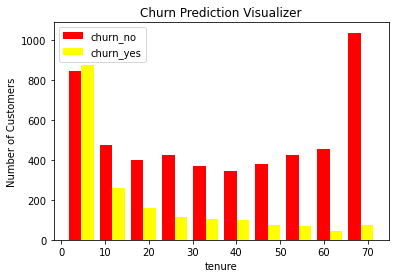

In [22]:
churn_no=df1[df1.Churn=='No'].tenure
churn_yes=df1[df1.Churn=='Yes'].tenure

plt.xlabel('tenure')
plt.ylabel('Number of Customers')
plt.title('Churn Prediction Visualizer')

plt.hist([churn_no,churn_yes],color=['red','yellow'],label=['churn_no','churn_yes'])
plt.legend()

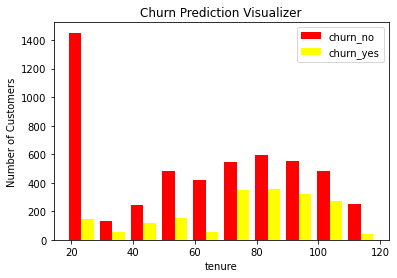

In [23]:
churn_no=df1[df1.Churn=='No'].MonthlyCharges
churn_yes=df1[df1.Churn=='Yes'].MonthlyCharges

plt.xlabel('tenure')
plt.ylabel('Number of Customers')
plt.title('Churn Prediction Visualizer')

plt.hist([churn_no,churn_yes],color=['red','yellow'],label=['churn_no','churn_yes'])
plt.legend()

In [24]:
def print_unique(df):
    for cols in df:
        if df[cols].dtype=='object':
            print(f'{cols}: {df[cols].unique()}')

In [25]:
print_unique(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [26]:
#Replacing No phone service with No same for No Internet service
df1.replace('No phone service','No',inplace=True)
df1.replace('No internet service','No',inplace=True)

C:\Users\visha\Anaconda3\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [28]:
print_unique(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [29]:
#Convert Yes and No to 1 or 0
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for cols in yes_no_columns:
    df1[cols].replace({'Yes':1,'No':0},inplace=True)

C:\Users\visha\Anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [30]:
print_unique(df1)

gender: ['Female' 'Male']
InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [32]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

C:\Users\visha\Anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [34]:
df1.gender.unique()

array([1, 0], dtype=int64)

In [35]:
print_unique(df1)

InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [36]:
#In the lest 3 cols we will apply one hot encoding
df2=pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [38]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6481,1,0,1,1,5,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
7016,1,0,0,0,1,1,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
308,0,1,1,1,38,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
175,1,0,1,0,34,1,1,0,0,0,...,0,0,1,1,0,0,0,0,1,0
3967,1,0,1,0,32,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1


In [39]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [40]:
cols=['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df2[cols]=scaler.fit_transform(df2[cols])

In [42]:
df2.sample(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3279,0,0,1,1,0.309859,1,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0
6938,1,0,1,1,0.929577,1,1,0,0,1,...,1,0,0,0,0,1,1,0,0,0
4820,1,0,1,0,0.802817,1,1,1,0,1,...,1,0,0,0,0,1,0,0,1,0
5225,0,0,1,1,1.000000,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
6482,0,0,0,0,0.000000,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
1525,1,0,1,1,0.084507,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4318,0,0,0,0,0.774648,1,0,0,1,0,...,1,0,0,0,1,0,1,0,0,0
3398,1,0,1,1,0.845070,1,1,1,1,1,...,0,1,0,0,1,0,0,1,0,0
1619,0,0,0,0,0.957746,1,1,1,1,1,...,1,0,0,0,0,1,0,1,0,0
764,0,0,1,1,0.901408,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1


In [43]:
df2.TotalCharges.values

array([0.0012751 , 0.21586661, 0.01031041, ..., 0.03780868, 0.03321025,
       0.78764136])

## All preprocessing and cleaning done

In [44]:
#train test split
X=df2.drop('Churn',axis=1)
y=df2['Churn']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=66)

In [45]:
X_train.shape

(5625, 26)

In [46]:
X_test.shape

(1407, 26)

In [48]:
len(X_train.columns)

26

In [49]:
from tensorflow import keras

In [51]:
model=keras.Sequential([
    keras.layers.Dense(26,input_shape=(26,),activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(7,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train,y_train,epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 1ms/step - loss: 0.5493 - accuracy: 0.7143
Epoch 2/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4386 - accuracy: 0.7929
Epoch 3/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4281 - accuracy: 0.7972
Epoch 4/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4249 - accuracy: 0.7996
Epoch 5/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4225 - accuracy: 0.8016
Epoch 6/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4215 - accuracy: 0.8027
Epoch 7/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4198 - accuracy: 0.8044
Epoch 8/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4174 - accuracy: 0.8050
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4169 - accuracy: 0.8062
Epoch 10/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4162 - accura

176/176 [==============================] - 0s 1ms/step - loss: 0.3557 - accuracy: 0.8363
Epoch 82/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3568 - accuracy: 0.8357
Epoch 83/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3547 - accuracy: 0.8404
Epoch 84/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3533 - accuracy: 0.8361
Epoch 85/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3535 - accuracy: 0.8377
Epoch 86/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3527 - accuracy: 0.8404
Epoch 87/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3531 - accuracy: 0.8402
Epoch 88/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3522 - accuracy: 0.8409
Epoch 89/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3504 - accuracy: 0.8375
Epoch 90/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3502 - accuracy: 

In [52]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4638 - accuracy: 0.7839


[0.46378108859062195, 0.7839374542236328]

In [54]:
yp=model.predict(X_test)
yp[:5]

array([[0.11195585],
       [0.00662205],
       [0.71096635],
       [0.817176  ],
       [0.8907695 ]], dtype=float32)

In [55]:
y_pred=[]
for ele in yp:
    if ele>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [56]:
y_pred[:10]

[0, 0, 1, 1, 1, 0, 1, 1, 0, 0]

In [57]:
y_test[:10]

1754    0
5773    0
5644    1
5130    1
818     1
1300    0
6866    1
2483    1
4550    0
4225    0
Name: Churn, dtype: int64

In [58]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1046
           1       0.58      0.58      0.58       361

    accuracy                           0.78      1407
   macro avg       0.72      0.72      0.72      1407
weighted avg       0.78      0.78      0.78      1407



Text(69.0, 0.5, 'Truth')

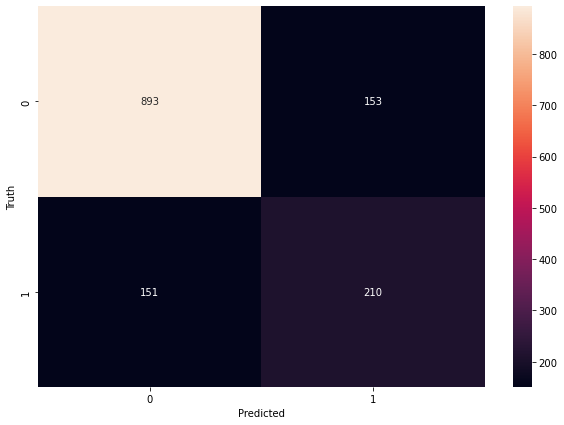

In [59]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')